# Recitation 1
### 16.Sep.22
#### Mariana Martínez Aguilar

The objective of today's recitation is to get comfortable with Jupyter notebooks and Python for solving optimization problems. 

## Rastringin

Suppose we want to find the minimum of the following function

$$ f(x,y) = 2 + x^2/20 - \cos(\pi*x/100) + y^2/20 - \cos(\pi*y/100) $$

### Generating plots
#### a) Plot this function's level sets in A = [-5, 5] x [-5, 5]. Can you guess which is the optimal value for such function?
When plotting, it is always a good idea to set the axis labels, set a title, the size of the plot, ... Make sure that the plots are giving information in the most clear way possible.

The size of the xi, the output of meshgrid is:   (1000, 1000)
The size of the yi, the output of meshgrid is:   (1000, 1000)


<function matplotlib.pyplot.show(close=None, block=None)>

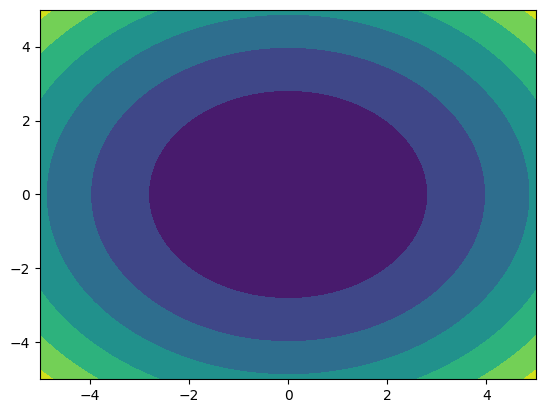

In [17]:
# Import some useful Python modules
import matplotlib.pyplot as plt
from math import cos, pi, sin
import numpy as np

# We need to define our function
def rastringin(x,y):
    return 2 + (x**2)/20 - cos(pi*x/100) + (y**2)/20 - cos(pi*y/100)

# We have to generate a mesh in which to evaluate our function
# What is meshgrid? What is linspace?
xi, yi = np.meshgrid( np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000) )
# What is the output of doing this? What are xi, yi?
print("The size of the xi, the output of meshgrid is:  ", xi.shape )
print("The size of the yi, the output of meshgrid is:  ", yi.shape )

# We can evaluate our function at every point in the mesh (so that we can display such evaluations in a plot)
f_eval = np.zeros(xi.shape)
mask = []
for i in range(1000):
    for j in range(1000):
        f_eval[i, j] = rastringin(xi[i,j], yi[i,j])

# Now we can plot
plt.figure()
plt.contourf(xi, yi, f_eval)


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

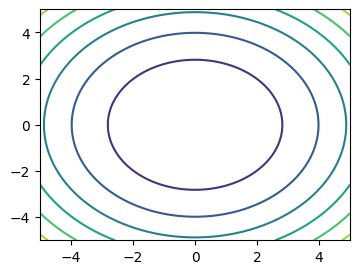

In [18]:
# Notice the difference between this plot and the following plot. Depending on what you want to show, 
# one might be more helpful than the other one

plt.figure(figsize = (4, 3))
plt.contour( xi, yi, f_eval )
plt.show



Both of these plots don't communicate information effectively. There is no title, what are we plotting? There is no axis labels. We know that the level sets should look more like circles, but in these plots they look like ellipses because the axis have different scales. We don't really know the function's values because we don't know the values of the level sets, there are just colors. You should take all of this into consideration when plotting. 

Enhance this plot, set its axis, set a title, its shape should be a square, not a rectangle, ...

<function matplotlib.pyplot.show(close=None, block=None)>

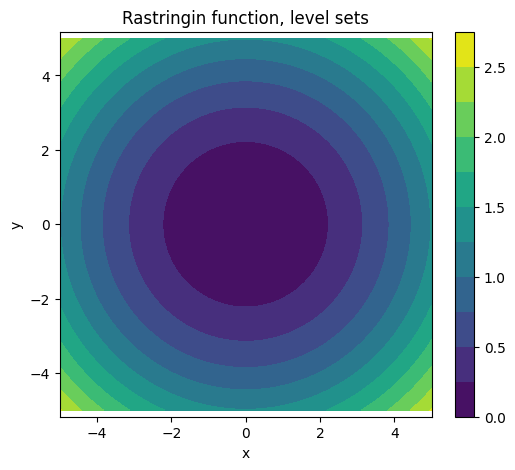

In [19]:
plt.figure(figsize = (6,5)) # Set figure size
plt.axis('equal') #same scale on both axis
plt.contourf(xi, yi, f_eval, levels = 10) # we can set levels to get more level sets
plt.title("Rastringin function, level sets")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()  #what is the value of the different colors? it shouldn't only look pretty, it should be informative

plt.show

#### b) Do a 3D plot of this function.

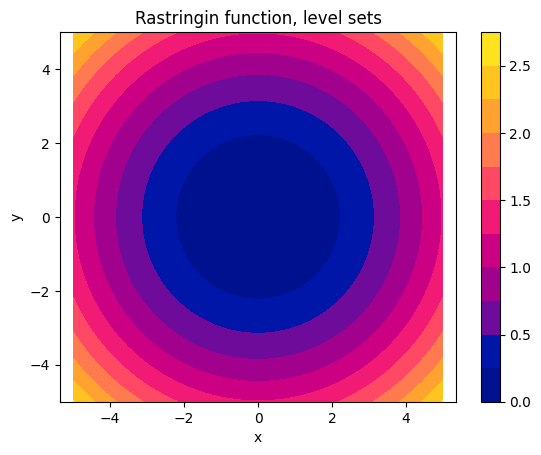

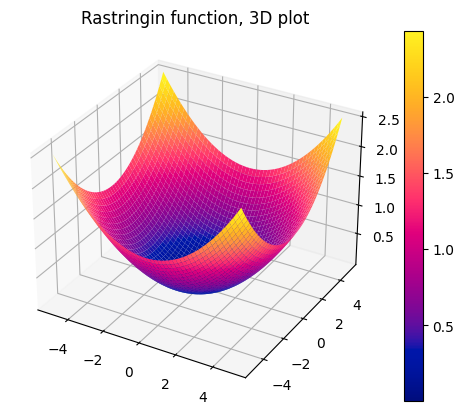

In [20]:
# We can add color maps
import colorcet as cc

plt.figure()
plt.axis('equal') 
plt.contourf(xi, yi, f_eval, levels = 10, cmap=cc.cm.bmy)
plt.title("Rastringin function, level sets")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show(block = False)

plt.figure()
ax = plt.axes(projection='3d') # telling Python we are plotting in 3D
im = ax.plot_surface(xi, yi, f_eval, cmap=cc.cm.bmy)
plt.colorbar(im)
plt.title("Rastringin function, 3D plot")
plt.show(block = False)

plt.show()


# What do you think plt.show(block = False)  does?

### Computing this function's gradient

If we want to minimize this function, we could use the steepest descent direction to do so. For this we need to calculate the gradient. 

#### a) Compute its gradient by hand and then define a function that will evaluate such gradient at different points (xi, yi)

Notice that we could approximate the gradient, but this is not a great idea here. If you know about floating point arithmetic then you might know that doing this might yield in catastrophic cancellations and other sorts of errors. Another problem in doing this is that we have no way of knowing "how close a point is" in comparison to the function values. If you can calculate the gradient by hand then the best idea is to do so and then define a function to evaluate it at different points. Remember that a gradient is a vector.

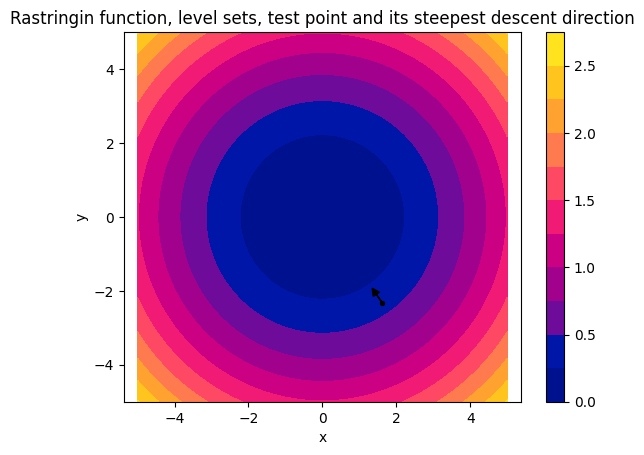

In [21]:
# We can define a function that is going to give us the gradient at any point

def grad_Rastringin(xi, yi):
    return np.array([ xi/10 + pi/100*sin(pi*xi/100), yi/10 + pi/60*sin(pi*yi/100)])

# For a random point on the grid show its gradient
x_test = [tuple(np.random.uniform(-5, 5, 2))]
grad_x_test = grad_Rastringin( *x_test[0]  )

plt.figure()
plt.axis('equal') 
im = plt.contourf(xi, yi, f_eval, levels = 10, cmap=cc.cm.bmy)
plt.title("Rastringin function, level sets, test point and its steepest descent direction")
plt.scatter( x_test[0][0], x_test[0][1], c = "black" , s = 8)
plt.arrow( x_test[0][0], x_test[0][1], -grad_x_test[0], -grad_x_test[1], head_width=0.2, 
          head_length=0.2, color = "black"  )
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(im)
plt.show(block = False)

#### b) Generate 10 random initial points and take 10 steps using gradient descent. Plot the trajectories.

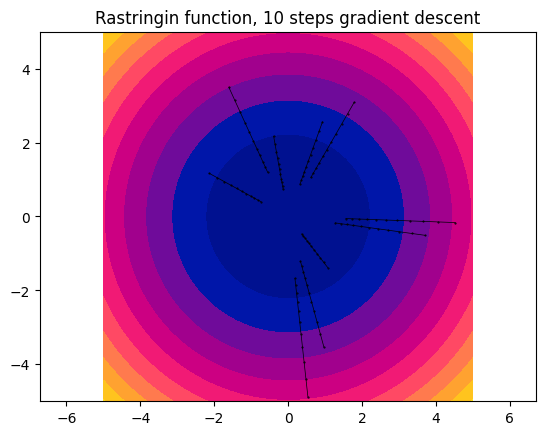

In [22]:
plt.figure()
plt.axis('equal') 
im = plt.contourf(xi, yi, f_eval, levels = 10, cmap=cc.cm.bmy)
plt.title("Rastringin function, 10 steps gradient descent")
for _ in range(10):
    p = [tuple(np.random.uniform(-5, 5, 2))]
    for i in range(10):
        p.append(tuple(np.subtract(p[-1], grad_Rastringin(*p[-1]))))
    p = np.array(p)
    plt.plot(*p.T, c='k', linewidth=0.5, markersize=1, marker = '.')

What is the intuition behind this? Since we only want to plot the trajectories, we aren't concerned in saving those trajectories in a vector or a matrix. Hence we can generate the first initial point (at random) and start a list. This list is going to contain all the points in the trajectory. As we perform gradient descent we are going to add the points in this list (hence the p.append). In python to get the last element in a list we can simply type [-1], we don't need to know the length of the list. After computing the 10 steps of gradient descent we can plot such trajectory and start all over again. Since we are using matplotlib we are adding layers to the plot, so each time we compute a trajectory and plot it we are plotting on top of the layers previously had.

## Modify the function

Modify the function and set it to:

$$ f(x,y) = 5 + x^2/4 - \frac{5}{2}*\cos(\pi*x/5) + y^2/4 - \frac{5}{2}*\cos(\pi*y/5) $$

Do all the previous steps again. What can you notice?

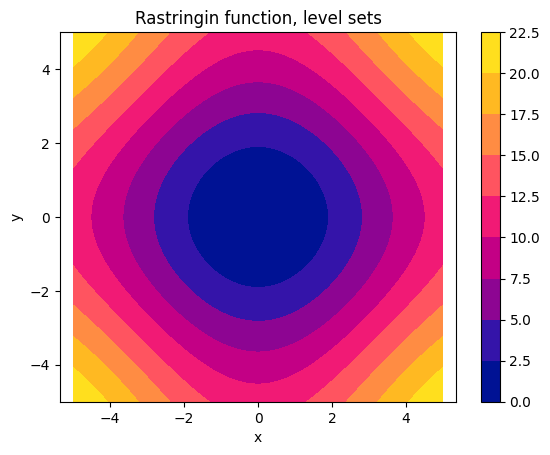

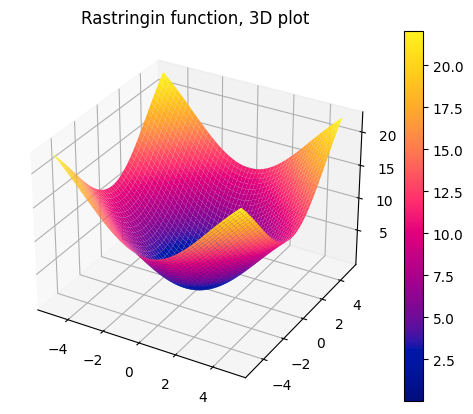

In [23]:
# We need to define our function
def rastringin(x,y):
    return 5 + x**2/4 - 5/2*cos(pi*x/5) + y**2/4 - 5/2*cos(pi*y/5)

# We have to generate a mesh in which to evaluate our function
# What is meshgrid? What is linspace?
xi, yi = np.meshgrid( np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000) )

# We can evaluate our function at every point in the mesh (so that we can display such evaluations in a plot)
f_eval = np.zeros(xi.shape)
mask = []
for i in range(1000):
    for j in range(1000):
        f_eval[i, j] = rastringin(xi[i,j], yi[i,j])

# We plot
        
plt.figure()
plt.axis('equal') 
plt.contourf(xi, yi, f_eval, levels = 10, cmap=cc.cm.bmy)
plt.title("Rastringin function, level sets")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show(block = False)

plt.figure()
ax = plt.axes(projection='3d') # telling Python we are plotting in 3D
im = ax.plot_surface(xi, yi, f_eval, cmap=cc.cm.bmy)
plt.colorbar(im)
plt.title("Rastringin function, 3D plot")
plt.show(block = False)

plt.show()

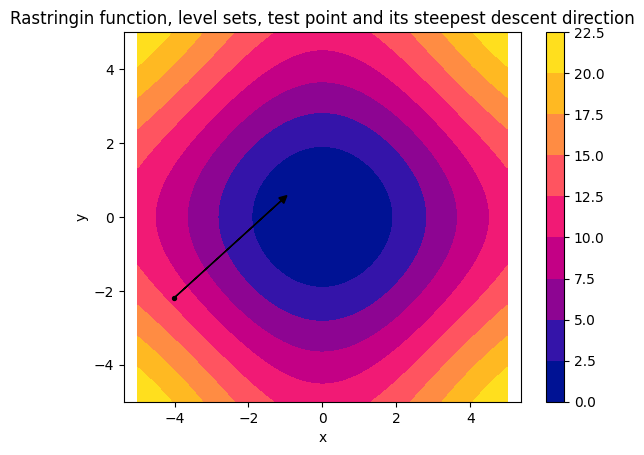

In [24]:
def grad_Rastringin(xi, yi):
    return np.array([ xi/2 + 0.5*pi*sin(pi*xi/5), yi/2 + 0.5*pi*sin(pi*yi/5)])

# For a random point on the grid show its gradient
x_test = [tuple(np.random.uniform(-5, 5, 2))]
grad_x_test = grad_Rastringin( *x_test[0]  )

plt.figure()
plt.axis('equal') 
im = plt.contourf(xi, yi, f_eval, levels = 10, cmap=cc.cm.bmy)
plt.title("Rastringin function, level sets, test point and its steepest descent direction")
plt.scatter( x_test[0][0], x_test[0][1], c = "black" , s = 8)
plt.arrow( x_test[0][0], x_test[0][1], -grad_x_test[0], -grad_x_test[1], head_width=0.2, head_length=0.2, color = "black"  )
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(im)
plt.show(block = False)

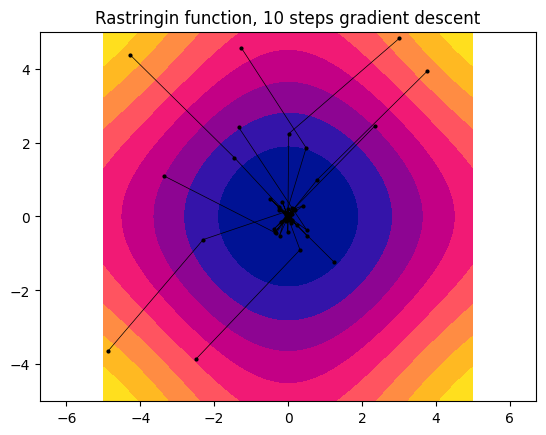

In [8]:
plt.figure()
plt.axis('equal') 
im = plt.contourf(xi, yi, f_eval, levels = 10, cmap=cc.cm.bmy)
plt.title("Rastringin function, 10 steps gradient descent")
for _ in range(10):
    p = [tuple(np.random.uniform(-5, 5, 2))]
    for i in range(10):
        p.append(tuple(np.subtract(p[-1], grad_Rastringin(*p[-1]))))
    p = np.array(p)
    plt.plot(*p.T, c='k', linewidth=0.5, markersize=4, marker = '.')